In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
telecom_cust = pd.read_csv('Telecom-Customer-Churn.csv')

In [58]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
# since the TotalCharges is in numeric-form converting it into numeric data types.

telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [61]:
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
# The code telecom_cust.dropna(inplace=True) is used to remove rows with missing values (NaN) from the DataFrame telecom_cust.
# The dropna method is a pandas function that removes any row containing at least one missing value.
telecom_cust.dropna(inplace = True)

In [63]:
# Making another dataframe without customerID because it has no affect in prediction
df2= telecom_cust.iloc[:,1:]

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [65]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=0, inplace=True)

In [66]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [67]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

In [68]:
def min_max_scale(df):
    df_scaled = df.copy()
    selected_columns=["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]
    for column in df_scaled[selected_columns]:
        min_val = df_scaled[column].min()
        max_val = df_scaled[column].max()
        df_scaled[column] = (df_scaled[column] - min_val) / (max_val - min_val)
    df_scaled=df_scaled.astype(float)
    return df_scaled

In [69]:
# Scaling all the Variables to a range of 0 to 1
df_scaled= min_max_scale(df_dummies)

In [70]:
X=df_scaled.drop('Churn', axis=1)
y=df_scaled['Churn'].values

In [71]:
def train_test_split(X, y, test_size=0.2):
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    
    indices = np.random.permutation(num_samples)
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]
    
    X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=0.2)

In [73]:
class LogisticRegression:
    def __init__(self, learning_rate, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(np.clip(y_pred, epsilon, 1-epsilon))
        y2 = (1 - y_true) * np.log(np.clip(1 - y_pred, epsilon, 1-epsilon))
        return -np.mean(y1 + y2)

    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))
            dz = A - y
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X, threshold=0.5):
        y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def accuracy(self,y,prediction):
        accurate_count=0
        compute_difference=y-prediction
        for i in range(len(compute_difference)):
            if (compute_difference[i]==0.0):
                accurate_count+=1
        accuracy= accurate_count/ len(compute_difference)
        return accuracy
        

In [74]:
# Running logistic regression model
model = LogisticRegression(1,1000)
result = model.fit(X_train, y_train)

In [75]:
prediction_test = model.predict(X_test)
print(model.accuracy(y_test, prediction_test))

0.8058321479374111


In [76]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [77]:
conf_matrix = confusion_matrix(y_test,prediction_test)

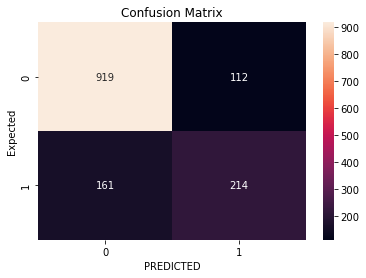

In [78]:
heatmap(conf_matrix, annot=True,fmt='d' , xticklabels=["0","1"])
plt.title('Confusion Matrix')
plt.xlabel('PREDICTED')
plt.ylabel('Expected')
plt.show()

In [79]:
print(conf_matrix)

[[919 112]
 [161 214]]


In [80]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [81]:
with open('model.pkl', 'rb') as file:
    loaded_model=pickle.load(file)

In [82]:
new_customer=pd.read_csv("new_customer.csv")

In [83]:
new_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,299.85


In [84]:
new_customer=pd.get_dummies(new_customer)

In [85]:
new_customer_data_encoded=new_customer.reindex(columns=df_dummies.columns, fill_value=False)

In [86]:
# 3. Scale features
new_customer_features = new_customer_data_encoded.drop(columns=['Churn'])
new_customer_features_scaled = min_max_scale(new_customer_features)

# new_customer_features_df = pd.DataFrame(new_customer_features_scaled, columns=features)
# 4. Make predictions
churn_prediction = loaded_model.predict(new_customer_features_scaled)
print(churn_prediction)

[0]
